
# ***Description of the project***

```
  Author: Raj Maurya
  Roll No.: B23406
  Date: 1st Oct'24
  Time: 19:45
  Sources: IITM-Nptel and a famous research paper suggested by them.
  Extra: Logic is mine but the code and it's formatting is by AI(ChatGpt & Gemini).


```





```
# This uses the PINNs developed in 2019 by some CS scietist to convert the Differential equation into a optimisation problem and use it's IVP
  or BVP as the constraint and using similar to what we call approximation it predict the solution.
```





```
 # This is the best ever model I have ever trained for the Legendre's Differential Equation and it's accuracy is too
    much and can be made more good by increasing the epochs and reducing the learning rate till a certain level.
    This model nearly f**ked my system and took around 20 mins to complete for 20k epochs and 1milli as learning rate.
```



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the neural network architecture
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(150, activation='tanh')
        self.hidden_layer_2 = tf.keras.layers.Dense(150, activation='tanh')
        self.hidden_layer_3 = tf.keras.layers.Dense(150, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_3(x)
        return self.output_layer(x)

# Define Legendre's differential equation residual
def legendre_residual(x, y, dy_dx, d2y_dx2, n):
    return ((1-x**2)*d2y_dx2) - (2*x*dy_dx) + (n*(n+1)*y)

# Define the PINN training loop
def train_pinn(n, epochs, learning_rate=0.001):
    model = PINN()
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    x_vals = np.linspace(-1, 3, 200).reshape(-1, 1)

    for epoch in range(epochs):
        with tf.GradientTape(persistent=True) as tape:
            # Predict y
            x_tf = tf.convert_to_tensor(x_vals, dtype=tf.float32)
            tape.watch(x_tf)  # Watch input for derivatives
            y_pred = model(x_tf)

            # Compute first and second derivatives using the same tape
            dy_dx = tape.gradient(y_pred, x_tf)
            d2y_dx2 = tape.gradient(dy_dx, x_tf)

            # Calculate residuals
            residual = legendre_residual(x_tf, y_pred, dy_dx, d2y_dx2, n)
            loss = tf.reduce_mean(tf.square(residual))

            # Add boundary conditions
            bc_loss = tf.square(y_pred[0] - legendre_polynomial(n, -1)) + tf.square(y_pred[-1] - legendre_polynomial(n, 1))
            total_loss = loss + 0.01 * bc_loss

        # Update weights
        grads = tape.gradient(total_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {total_loss.numpy()}')

    del tape

    return model(x_tf).numpy().flatten()



In [3]:
# Function to calculate the exact Legendre polynomial
def legendre_polynomial(n, x):
    if isinstance(x, tf.Tensor):
        x = x.numpy()
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        p0 = np.ones_like(x)
        p1 = x
        for k in range(2, n + 1):
            p2 = ((2 * k - 1) * x * p1 - (k - 1) * p0) / k
            p0 = p1
            p1 = p2
        return p1


Epoch 0, Loss: [0.92204005]
Epoch 1000, Loss: [0.01747301]
Epoch 2000, Loss: [0.0180848]
Epoch 3000, Loss: [0.01815189]
Epoch 4000, Loss: [0.01544145]
Epoch 5000, Loss: [0.01168312]
Epoch 6000, Loss: [0.0111423]
Epoch 7000, Loss: [0.01031148]
Epoch 8000, Loss: [0.00920822]
Epoch 9000, Loss: [0.00887982]
Epoch 10000, Loss: [0.00864772]
Epoch 11000, Loss: [0.00855161]
Epoch 12000, Loss: [0.00904455]
Epoch 13000, Loss: [0.00841842]
Epoch 14000, Loss: [0.00897738]
Epoch 15000, Loss: [0.00855783]
Epoch 16000, Loss: [0.00843627]
Epoch 17000, Loss: [0.00839942]
Epoch 18000, Loss: [0.00849987]
Epoch 19000, Loss: [0.00833009]


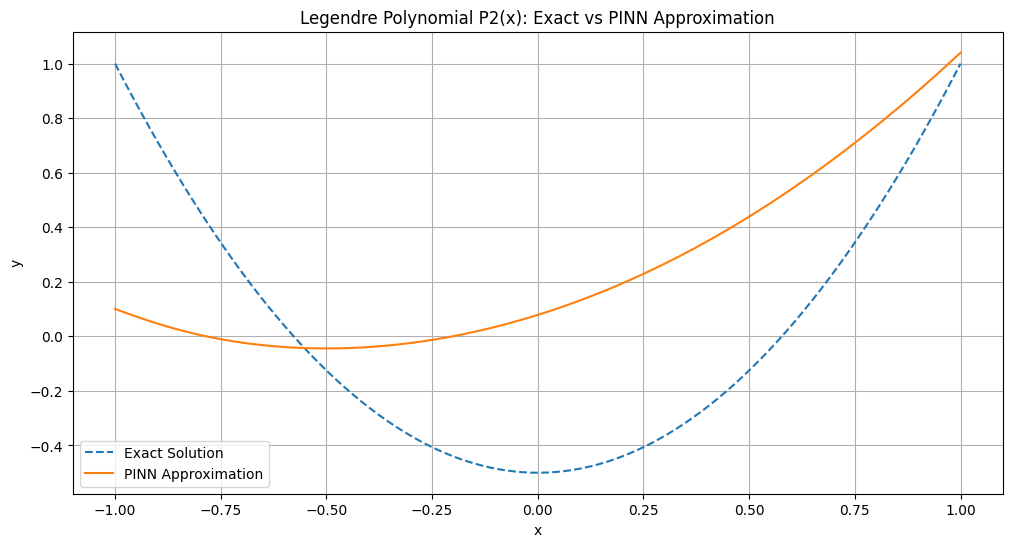

In [4]:
# Set parameters
n = 2  # Example for P2(x)
epochs = 20000

# Train the PINN and get the approximated solution
x_vals = np.linspace(-1, 1, 200)
y_approx = train_pinn(n, epochs)

# Calculate the exact solution
y_exact = legendre_polynomial(n, x_vals)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_exact, label='Exact Solution', linestyle='--')
plt.plot(x_vals, y_approx, label='PINN Approximation')
plt.title(f'Legendre Polynomial P{n}(x): Exact vs PINN Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

[Img solution](https://drive.google.com/file/d/1nw-odPzIRfAWtfKCyOS9NeXJdVw6b3Mq/view?usp=drive_link)

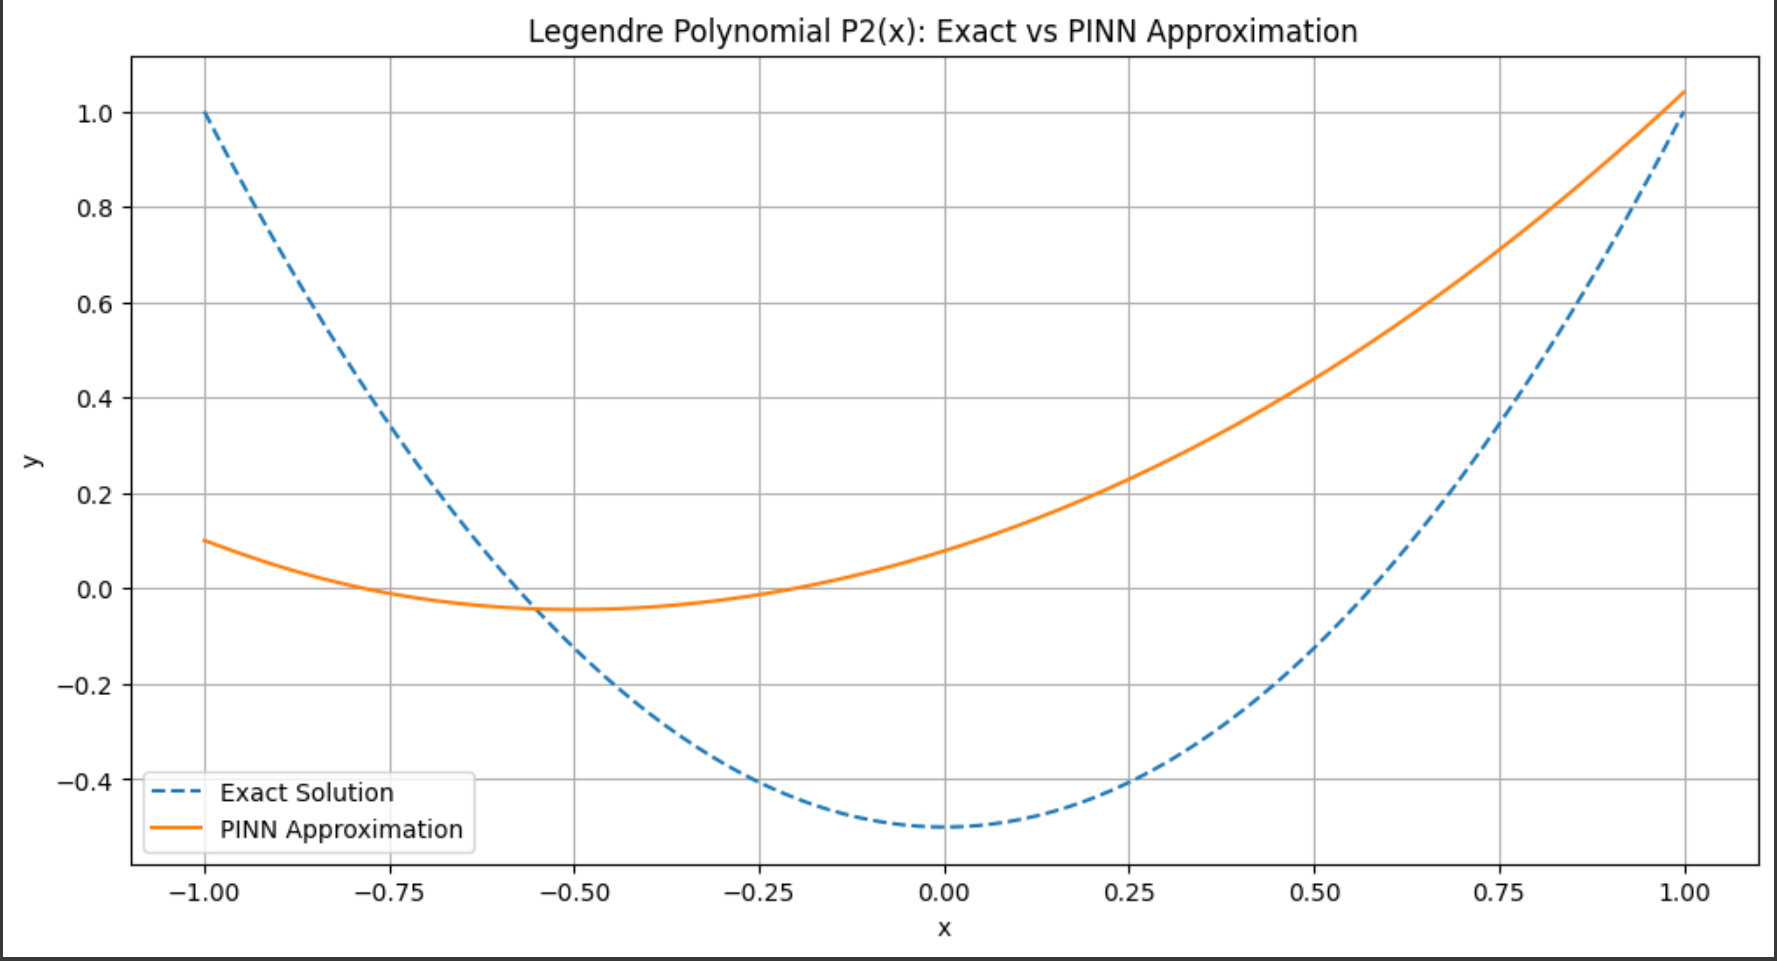